In [1]:
#import training data
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames - required if code is run on Python 2.7
training_data_2 = pd.read_csv('train.csv')
display(training_data_2.head())
print('Training data shape: ', training_data_2.shape)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Training data shape:  (1458644, 11)


In [2]:
#function to determine day of the week
import time
time_format = '%Y-%m-%d %H:%M:%S'
def get_weekday(date_str):
    time_obj = time.strptime(date_str,time_format)
    return time_obj.tm_wday

training_data_2['pickup_weekday'] = [get_weekday(date_str) for date_str in training_data_2['pickup_datetime']]

#get pick up hour
def get_hour(date_str):
    time_obj = time.strptime(date_str,time_format)
    return time_obj.tm_hour

training_data_2['pickup_hour'] = [get_hour(date_str) for date_str in training_data_2['pickup_datetime']]

display(training_data_2.head())
print('Training data shape: ', training_data_2.shape)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,13


Training data shape:  (1458644, 13)


In [3]:
#convert pick up date to float to make it usable in model training
import math
training_data_2['pickup_datetime_float'] = [math.log(time.mktime(time.strptime(d,time_format))) 
                                    for d in training_data_2['pickup_datetime']]
display(training_data_2.head())
print('Training data shape: ', training_data_2.shape)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_hour,pickup_datetime_float
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,17,21.100283
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,21.105564
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,21.097004
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,19,21.101653
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,13,21.100984


Training data shape:  (1458644, 14)


In [4]:
#one hot encode stoare and fwd flag
import numpy as np
print(training_data_2.store_and_fwd_flag.unique())
training_data_2['store_and_fwd_flag_encode'] = np.where(training_data_2['store_and_fwd_flag'].str.match('Y'),1,0)
display(training_data_2.head())
print('Training data shape: ', training_data_2.shape)

['N' 'Y']


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,17,21.100283,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,21.105564,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,21.097004,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,19,21.101653,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,13,21.100984,0


Training data shape:  (1458644, 15)


In [5]:
#converting trip duration to hours for calculation ease
training_data_2['trip_duration_hrs'] = [duration_in_seconds/3600.0 for duration_in_seconds in 
                                          training_data_2['trip_duration']]
display(training_data_2.head())
print('Training data shape: ', training_data_2.shape)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode,trip_duration_hrs
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,17,21.100283,0,0.126389
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,21.105564,0,0.184167
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,21.097004,0,0.590000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,19,21.101653,0,0.119167
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,13,21.100984,0,0.120833


Training data shape:  (1458644, 16)


In [6]:
#calculate latitude difference, longitude difference and speed for analysis
import math
training_data_2['latitude_difference'] = [dropoff_val-pickup_val for pickup_val, dropoff_val in 
                                            zip(training_data_2['pickup_latitude'], training_data_2['dropoff_latitude'])]
training_data_2['longitude_difference'] = [dropoff_val-pickup_val for pickup_val, dropoff_val in 
                                            zip(training_data_2['pickup_longitude'], training_data_2['dropoff_longitude'])]
training_data_2['displacement'] = [math.sqrt(math.pow(lat_diff,2)+math.pow(long_diff,2)) for lat_diff, long_diff in 
                                            zip(training_data_2['latitude_difference'], 
                                                training_data_2['longitude_difference'])]
#speed feature needs to be dropped before training as this feature cannot be derived for testing data
#this feature is used only for analysis only as trip duration will depend on the speed of travel
training_data_2['speed'] = [dist/timee for dist, timee in zip(training_data_2['displacement'], 
                                                                training_data_2['trip_duration_hrs'])]
display(training_data_2.head())
print('Training data shape: ', training_data_2.shape)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode,trip_duration_hrs,latitude_difference,longitude_difference,displacement,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,17,21.100283,0,0.126389,-0.002335,0.017525,0.017680,0.139882
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,21.105564,0,0.184167,-0.007412,-0.019066,0.020456,0.111073
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,21.097004,0,0.590000,-0.053852,-0.026306,0.059934,0.101583
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,19,21.101653,0,0.119167,-0.013252,-0.002228,0.013438,0.112768
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,13,21.100984,0,0.120833,-0.010689,0.000130,0.010690,0.088465


Training data shape:  (1458644, 20)


In [7]:
#eliminate outliers for the data for clean data and better visualization
outlier_array_list = []
for key in training_data_2:
    #restricting the anaylysis to trip duration - 10K rows eliminated
    #restricting the analysis to speed - 3K rows eliminated
    #extend this to all features id necessary
    if training_data_2[key].dtypes == 'float64' or key =='trip_duration':
        print('Analysis for ', key)
        Q1 = np.percentile(training_data_2[key], 25)
        print('Q1 ', Q1)
        Q3 = np.percentile(training_data_2[key], 75)
        print('Q3 ', Q3)
        interquartile_range = Q3-Q1
        step = 1.5*interquartile_range
        print('step ', step)
        print ("Data points considered outliers for the feature :", key)
        display(training_data_2[~((training_data_2[key] >= Q1 - step) & (training_data_2[key] <= Q3 + step))])
        #additional code to eliminate all outliers
        outlier_array = (np.where([~((training_data_2[key] >= Q1 - step) & (training_data_2[key] <= Q3 + step))]))
        print(outlier_array[1])
        for outlier in outlier_array[1]:
            outlier_array_list.append(outlier)
        
outliers = list(set(outlier_array_list))
good_data = training_data_2.drop(training_data_2.index[outliers]).reset_index(drop = True)
display(good_data.head())
print(good_data.shape)

Analysis for  pickup_longitude
Q1  -73.9918670654
Q3  -73.9673309326
step  0.0368041992188
Data points considered outliers for the feature : pickup_longitude


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode,trip_duration_hrs,latitude_difference,longitude_difference,displacement,speed
55,id3827863,2,2016-04-19 11:29:08,2016-04-19 12:27:56,3,-73.792892,40.657879,-73.809189,40.690182,N,3528,1,11,21.102402,0,0.980000,0.032303,-0.016296,0.036181,0.036919
70,id3896508,2,2016-06-07 22:32:32,2016-06-07 22:46:06,1,-73.863380,40.769890,-73.837128,40.721359,N,814,1,22,21.105323,0,0.226111,-0.048531,0.026253,0.055176,0.244023
86,id0283075,1,2016-04-06 23:42:26,2016-04-07 00:12:08,1,-73.782478,40.644646,-73.981125,40.720886,N,1782,2,23,21.101663,0,0.495000,0.076241,-0.198647,0.212775,0.429848
93,id2030290,1,2016-03-31 11:33:30,2016-03-31 12:12:31,3,-73.864319,40.769829,-73.985863,40.760952,N,2341,3,11,21.101276,0,0.650278,-0.008877,-0.121544,0.121868,0.187409
98,id2102594,1,2016-03-30 16:14:29,2016-03-30 17:01:33,1,-73.789841,40.643559,-73.970665,40.687279,N,2824,2,16,21.101228,0,0.784444,0.043720,-0.180824,0.186035,0.237155
102,id0105610,1,2016-02-19 20:01:24,2016-02-19 20:35:49,3,-73.789719,40.643707,-73.978699,40.750343,N,2065,4,20,21.098866,0,0.573611,0.106636,-0.188980,0.216990,0.378288
104,id3508035,2,2016-06-06 20:13:56,2016-06-06 20:45:20,6,-73.788132,40.641460,-73.971771,40.749409,N,1884,0,20,21.105258,0,0.523333,0.107948,-0.183640,0.213017,0.407039
111,id0589360,1,2016-05-22 17:34:08,2016-05-22 18:20:01,1,-73.863678,40.769772,-74.007217,40.704895,N,2753,6,17,21.104367,0,0.764722,-0.064877,-0.143539,0.157520,0.205983
115,id2358953,2,2016-06-27 00:31:28,2016-06-27 01:06:44,1,-73.870819,40.773739,-73.857498,41.017811,N,2116,0,0,21.106447,0,0.587778,0.244072,0.013321,0.244435,0.415863
198,id3942917,1,2016-04-29 14:18:39,2016-04-29 15:05:36,4,-73.862778,40.769314,-73.986130,40.748581,N,2817,4,14,21.103000,0,0.782500,-0.020733,-0.123352,0.125082,0.159850


[     55      70      86 ..., 1458590 1458600 1458636]
Analysis for  pickup_latitude
Q1  40.7373466492
Q3  40.7683601379
step  0.0465202331543
Data points considered outliers for the feature : pickup_latitude


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode,trip_duration_hrs,latitude_difference,longitude_difference,displacement,speed
55,id3827863,2,2016-04-19 11:29:08,2016-04-19 12:27:56,3,-73.792892,40.657879,-73.809189,40.690182,N,3528,1,11,21.102402,0,0.980000,0.032303,-0.016296,0.036181,0.036919
86,id0283075,1,2016-04-06 23:42:26,2016-04-07 00:12:08,1,-73.782478,40.644646,-73.981125,40.720886,N,1782,2,23,21.101663,0,0.495000,0.076241,-0.198647,0.212775,0.429848
98,id2102594,1,2016-03-30 16:14:29,2016-03-30 17:01:33,1,-73.789841,40.643559,-73.970665,40.687279,N,2824,2,16,21.101228,0,0.784444,0.043720,-0.180824,0.186035,0.237155
102,id0105610,1,2016-02-19 20:01:24,2016-02-19 20:35:49,3,-73.789719,40.643707,-73.978699,40.750343,N,2065,4,20,21.098866,0,0.573611,0.106636,-0.188980,0.216990,0.378288
104,id3508035,2,2016-06-06 20:13:56,2016-06-06 20:45:20,6,-73.788132,40.641460,-73.971771,40.749409,N,1884,0,20,21.105258,0,0.523333,0.107948,-0.183640,0.213017,0.407039
231,id1868620,2,2016-06-18 00:41:28,2016-06-18 01:10:34,1,-73.781860,40.644684,-73.961922,40.767033,N,1746,5,0,21.105918,0,0.485000,0.122349,-0.180061,0.217695,0.448857
233,id0952827,2,2016-03-25 00:22:07,2016-03-25 00:36:20,1,-73.998062,40.674809,-74.004440,40.732651,N,853,4,0,21.100893,0,0.236944,0.057842,-0.006378,0.058193,0.245597
268,id1636593,2,2016-04-25 17:37:13,2016-04-25 18:23:12,1,-73.790154,40.646614,-73.981918,40.756680,N,2759,0,17,21.102772,0,0.766389,0.110065,-0.191765,0.221107,0.288505
319,id1703171,2,2016-01-30 22:42:51,2016-01-30 23:23:44,5,-73.786217,40.645287,-73.993073,40.729729,N,2453,5,22,21.097685,0,0.681389,0.084442,-0.206856,0.223427,0.327900
354,id3402983,2,2016-06-30 15:48:06,2016-06-30 17:31:13,1,-73.781898,40.644772,-73.985893,40.760159,N,6187,3,15,21.106662,0,1.718611,0.115387,-0.203995,0.234367,0.136370


[     55      86      98 ..., 1458584 1458589 1458600]
Analysis for  dropoff_longitude
Q1  -73.9913253784
Q3  -73.9630126953
step  0.0424690246582
Data points considered outliers for the feature : dropoff_longitude


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode,trip_duration_hrs,latitude_difference,longitude_difference,displacement,speed
24,id3321406,2,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.788750,40.641472,N,2485,4,8,21.105052,0,0.690278,-0.135662,0.166481,0.214756,0.311115
29,id1410897,1,2016-03-23 14:10:39,2016-03-23 14:49:30,1,-73.982117,40.756351,-73.865692,40.770988,N,2331,2,14,21.100808,0,0.647500,0.014637,0.116425,0.117341,0.181222
33,id0023813,1,2016-04-17 14:38:30,2016-04-17 15:16:19,1,-73.990311,40.756580,-73.870918,40.773930,N,2269,6,14,21.102292,0,0.630278,0.017349,0.119392,0.120646,0.191418
50,id2067879,2,2016-01-19 23:19:01,2016-01-19 23:44:58,1,-73.996819,40.752861,-73.809006,40.816875,N,1557,1,23,21.097033,0,0.432500,0.064014,0.187813,0.198423,0.458780
55,id3827863,2,2016-04-19 11:29:08,2016-04-19 12:27:56,3,-73.792892,40.657879,-73.809189,40.690182,N,3528,1,11,21.102402,0,0.980000,0.032303,-0.016296,0.036181,0.036919
70,id3896508,2,2016-06-07 22:32:32,2016-06-07 22:46:06,1,-73.863380,40.769890,-73.837128,40.721359,N,814,1,22,21.105323,0,0.226111,-0.048531,0.026253,0.055176,0.244023
74,id1158195,1,2016-03-24 17:58:51,2016-03-24 18:36:46,1,-73.992325,40.730721,-73.872505,40.774498,N,2275,3,17,21.100877,0,0.631944,0.043777,0.119820,0.127567,0.201863
92,id0673727,2,2016-05-18 19:15:27,2016-05-18 19:44:49,1,-73.961678,40.775967,-73.857391,40.733284,N,1762,2,19,21.104135,0,0.489444,-0.042683,0.104286,0.112683,0.230226
115,id2358953,2,2016-06-27 00:31:28,2016-06-27 01:06:44,1,-73.870819,40.773739,-73.857498,41.017811,N,2116,0,0,21.106447,0,0.587778,0.244072,0.013321,0.244435,0.415863
137,id0659170,2,2016-03-26 13:07:08,2016-03-26 13:29:02,1,-73.968658,40.764507,-73.872833,40.771454,N,1314,5,13,21.100983,0,0.365000,0.006947,0.095825,0.096077,0.263224


[     24      29      33 ..., 1458547 1458589 1458636]
Analysis for  dropoff_latitude
Q1  40.7358846664
Q3  40.7698097229
step  0.0508875846863
Data points considered outliers for the feature : dropoff_latitude


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode,trip_duration_hrs,latitude_difference,longitude_difference,displacement,speed
24,id3321406,2,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.788750,40.641472,N,2485,4,8,21.105052,0,0.690278,-0.135662,0.166481,0.214756,0.311115
27,id2104175,1,2016-06-20 23:07:16,2016-06-20 23:18:50,1,-73.958435,40.713192,-73.949539,40.680252,N,694,0,23,21.106090,0,0.192778,-0.032940,0.008896,0.034120,0.176991
31,id2822549,2,2016-05-21 13:03:24,2016-05-21 13:20:52,1,-73.998268,40.720039,-74.010361,40.672138,N,1048,5,13,21.104297,0,0.291111,-0.047901,-0.012093,0.049404,0.169708
67,id3913101,1,2016-06-25 22:05:46,2016-06-25 22:22:29,2,-74.001411,40.761433,-73.924629,40.864029,N,1003,5,22,21.106382,0,0.278611,0.102596,0.076782,0.128146,0.459947
115,id2358953,2,2016-06-27 00:31:28,2016-06-27 01:06:44,1,-73.870819,40.773739,-73.857498,41.017811,N,2116,0,0,21.106447,0,0.587778,0.244072,0.013321,0.244435,0.415863
167,id0906779,1,2016-04-19 08:31:48,2016-04-19 09:14:11,2,-73.971558,40.750629,-73.952629,40.631596,N,2543,1,8,21.102395,0,0.706389,-0.119034,0.018929,0.120529,0.170628
168,id2326430,2,2016-06-10 22:06:53,2016-06-10 22:23:14,1,-73.956879,40.774872,-73.936508,40.857185,N,981,4,22,21.105499,0,0.272500,0.082314,0.020370,0.084797,0.311180
185,id3198639,1,2016-06-05 03:02:46,2016-06-05 03:14:59,1,-73.979790,40.781265,-73.940880,40.823223,N,733,6,3,21.105157,0,0.203611,0.041958,0.038910,0.057223,0.281039
220,id2050990,2,2016-06-20 21:05:09,2016-06-20 21:47:45,1,-73.990082,40.756737,-73.955132,40.677525,N,2556,0,21,21.106085,0,0.710000,-0.079212,0.034950,0.086580,0.121944
266,id2693088,2,2016-04-23 23:28:09,2016-04-23 23:43:01,2,-73.975418,40.787075,-73.942657,40.823551,N,892,5,23,21.102668,0,0.247778,0.036476,0.032761,0.049028,0.197872


[     24      27      31 ..., 1458536 1458553 1458629]
Analysis for  trip_duration
Q1  397.0
Q3  1075.0
step  1017.0
Data points considered outliers for the feature : trip_duration


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode,trip_duration_hrs,latitude_difference,longitude_difference,displacement,speed
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,21.097004,0,0.590000,-0.053852,-0.026306,0.059934,0.101583
16,id3379579,2,2016-04-11 17:29:50,2016-04-11 18:08:26,1,-73.991165,40.755562,-73.999290,40.725353,N,2316,0,17,21.101944,0,0.643333,-0.030209,-0.008125,0.031282,0.048625
24,id3321406,2,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.788750,40.641472,N,2485,4,8,21.105052,0,0.690278,-0.135662,0.166481,0.214756,0.311115
29,id1410897,1,2016-03-23 14:10:39,2016-03-23 14:49:30,1,-73.982117,40.756351,-73.865692,40.770988,N,2331,2,14,21.100808,0,0.647500,0.014637,0.116425,0.117341,0.181222
33,id0023813,1,2016-04-17 14:38:30,2016-04-17 15:16:19,1,-73.990311,40.756580,-73.870918,40.773930,N,2269,6,14,21.102292,0,0.630278,0.017349,0.119392,0.120646,0.191418
55,id3827863,2,2016-04-19 11:29:08,2016-04-19 12:27:56,3,-73.792892,40.657879,-73.809189,40.690182,N,3528,1,11,21.102402,0,0.980000,0.032303,-0.016296,0.036181,0.036919
57,id1079955,1,2016-04-22 11:28:00,2016-04-22 12:11:27,1,-73.994850,40.718781,-73.983414,40.758850,N,2607,4,11,21.102579,0,0.724167,0.040070,0.011436,0.041670,0.057542
74,id1158195,1,2016-03-24 17:58:51,2016-03-24 18:36:46,1,-73.992325,40.730721,-73.872505,40.774498,N,2275,3,17,21.100877,0,0.631944,0.043777,0.119820,0.127567,0.201863
77,id3769871,1,2016-06-17 17:32:59,2016-06-17 18:11:56,1,-73.943146,40.789631,-73.989479,40.762764,N,2337,4,17,21.105900,0,0.649167,-0.026867,-0.046333,0.053559,0.082505
93,id2030290,1,2016-03-31 11:33:30,2016-03-31 12:12:31,3,-73.864319,40.769829,-73.985863,40.760952,N,2341,3,11,21.101276,0,0.650278,-0.008877,-0.121544,0.121868,0.187409


[      2      16      24 ..., 1458589 1458600 1458621]
Analysis for  pickup_datetime_float
Q1  21.0987395074
Q3  21.1039199274
step  0.00777063011344
Data points considered outliers for the feature : pickup_datetime_float


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode,trip_duration_hrs,latitude_difference,longitude_difference,displacement,speed


[]
Analysis for  trip_duration_hrs
Q1  0.110277777778
Q3  0.298611111111
step  0.2825
Data points considered outliers for the feature : trip_duration_hrs


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode,trip_duration_hrs,latitude_difference,longitude_difference,displacement,speed
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,21.097004,0,0.590000,-0.053852,-0.026306,0.059934,0.101583
16,id3379579,2,2016-04-11 17:29:50,2016-04-11 18:08:26,1,-73.991165,40.755562,-73.999290,40.725353,N,2316,0,17,21.101944,0,0.643333,-0.030209,-0.008125,0.031282,0.048625
24,id3321406,2,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.788750,40.641472,N,2485,4,8,21.105052,0,0.690278,-0.135662,0.166481,0.214756,0.311115
29,id1410897,1,2016-03-23 14:10:39,2016-03-23 14:49:30,1,-73.982117,40.756351,-73.865692,40.770988,N,2331,2,14,21.100808,0,0.647500,0.014637,0.116425,0.117341,0.181222
33,id0023813,1,2016-04-17 14:38:30,2016-04-17 15:16:19,1,-73.990311,40.756580,-73.870918,40.773930,N,2269,6,14,21.102292,0,0.630278,0.017349,0.119392,0.120646,0.191418
55,id3827863,2,2016-04-19 11:29:08,2016-04-19 12:27:56,3,-73.792892,40.657879,-73.809189,40.690182,N,3528,1,11,21.102402,0,0.980000,0.032303,-0.016296,0.036181,0.036919
57,id1079955,1,2016-04-22 11:28:00,2016-04-22 12:11:27,1,-73.994850,40.718781,-73.983414,40.758850,N,2607,4,11,21.102579,0,0.724167,0.040070,0.011436,0.041670,0.057542
74,id1158195,1,2016-03-24 17:58:51,2016-03-24 18:36:46,1,-73.992325,40.730721,-73.872505,40.774498,N,2275,3,17,21.100877,0,0.631944,0.043777,0.119820,0.127567,0.201863
77,id3769871,1,2016-06-17 17:32:59,2016-06-17 18:11:56,1,-73.943146,40.789631,-73.989479,40.762764,N,2337,4,17,21.105900,0,0.649167,-0.026867,-0.046333,0.053559,0.082505
93,id2030290,1,2016-03-31 11:33:30,2016-03-31 12:12:31,3,-73.864319,40.769829,-73.985863,40.760952,N,2341,3,11,21.101276,0,0.650278,-0.008877,-0.121544,0.121868,0.187409


[      2      16      24 ..., 1458589 1458600 1458621]
Analysis for  latitude_difference
Q1  -0.0134201049805
Q3  0.0139923095703
step  0.0411186218262
Data points considered outliers for the feature : latitude_difference


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode,trip_duration_hrs,latitude_difference,longitude_difference,displacement,speed
14,id2900608,2,2016-05-27 00:43:36,2016-05-27 01:07:10,1,-73.992195,40.727226,-73.974655,40.783070,N,1414,4,0,21.104620,0,0.392778,0.055843,0.017540,0.058533,0.149024
24,id3321406,2,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.788750,40.641472,N,2485,4,8,21.105052,0,0.690278,-0.135662,0.166481,0.214756,0.311115
45,id0718344,2,2016-06-13 15:52:20,2016-06-13 16:16:58,1,-74.016327,40.704990,-73.982109,40.773750,N,1478,0,15,21.105660,0,0.410556,0.068760,0.034218,0.076804,0.187072
50,id2067879,2,2016-01-19 23:19:01,2016-01-19 23:44:58,1,-73.996819,40.752861,-73.809006,40.816875,N,1557,1,23,21.097033,0,0.432500,0.064014,0.187813,0.198423,0.458780
54,id0526266,2,2016-05-15 09:42:58,2016-05-15 09:56:37,1,-73.934883,40.801010,-73.983002,40.722569,N,819,6,9,21.103934,0,0.227500,-0.078442,-0.048119,0.092024,0.404503
67,id3913101,1,2016-06-25 22:05:46,2016-06-25 22:22:29,2,-74.001411,40.761433,-73.924629,40.864029,N,1003,5,22,21.106382,0,0.278611,0.102596,0.076782,0.128146,0.459947
86,id0283075,1,2016-04-06 23:42:26,2016-04-07 00:12:08,1,-73.782478,40.644646,-73.981125,40.720886,N,1782,2,23,21.101663,0,0.495000,0.076241,-0.198647,0.212775,0.429848
102,id0105610,1,2016-02-19 20:01:24,2016-02-19 20:35:49,3,-73.789719,40.643707,-73.978699,40.750343,N,2065,4,20,21.098866,0,0.573611,0.106636,-0.188980,0.216990,0.378288
104,id3508035,2,2016-06-06 20:13:56,2016-06-06 20:45:20,6,-73.788132,40.641460,-73.971771,40.749409,N,1884,0,20,21.105258,0,0.523333,0.107948,-0.183640,0.213017,0.407039
111,id0589360,1,2016-05-22 17:34:08,2016-05-22 18:20:01,1,-73.863678,40.769772,-74.007217,40.704895,N,2753,6,17,21.104367,0,0.764722,-0.064877,-0.143539,0.157520,0.205983


[     14      24      45 ..., 1458589 1458600 1458641]
Analysis for  longitude_difference
Q1  -0.0112686157227
Q3  0.0139389038086
step  0.0378112792969
Data points considered outliers for the feature : longitude_difference


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode,trip_duration_hrs,latitude_difference,longitude_difference,displacement,speed
24,id3321406,2,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.788750,40.641472,N,2485,4,8,21.105052,0,0.690278,-0.135662,0.166481,0.214756,0.311115
29,id1410897,1,2016-03-23 14:10:39,2016-03-23 14:49:30,1,-73.982117,40.756351,-73.865692,40.770988,N,2331,2,14,21.100808,0,0.647500,0.014637,0.116425,0.117341,0.181222
33,id0023813,1,2016-04-17 14:38:30,2016-04-17 15:16:19,1,-73.990311,40.756580,-73.870918,40.773930,N,2269,6,14,21.102292,0,0.630278,0.017349,0.119392,0.120646,0.191418
50,id2067879,2,2016-01-19 23:19:01,2016-01-19 23:44:58,1,-73.996819,40.752861,-73.809006,40.816875,N,1557,1,23,21.097033,0,0.432500,0.064014,0.187813,0.198423,0.458780
67,id3913101,1,2016-06-25 22:05:46,2016-06-25 22:22:29,2,-74.001411,40.761433,-73.924629,40.864029,N,1003,5,22,21.106382,0,0.278611,0.102596,0.076782,0.128146,0.459947
74,id1158195,1,2016-03-24 17:58:51,2016-03-24 18:36:46,1,-73.992325,40.730721,-73.872505,40.774498,N,2275,3,17,21.100877,0,0.631944,0.043777,0.119820,0.127567,0.201863
80,id1519515,2,2016-06-11 12:52:19,2016-06-11 13:12:10,1,-73.950493,40.771267,-74.001244,40.746490,N,1191,5,12,21.105535,0,0.330833,-0.024776,-0.050751,0.056476,0.170708
86,id0283075,1,2016-04-06 23:42:26,2016-04-07 00:12:08,1,-73.782478,40.644646,-73.981125,40.720886,N,1782,2,23,21.101663,0,0.495000,0.076241,-0.198647,0.212775,0.429848
92,id0673727,2,2016-05-18 19:15:27,2016-05-18 19:44:49,1,-73.961678,40.775967,-73.857391,40.733284,N,1762,2,19,21.104135,0,0.489444,-0.042683,0.104286,0.112683,0.230226
93,id2030290,1,2016-03-31 11:33:30,2016-03-31 12:12:31,3,-73.864319,40.769829,-73.985863,40.760952,N,2341,3,11,21.101276,0,0.650278,-0.008877,-0.121544,0.121868,0.187409


[     24      29      33 ..., 1458584 1458589 1458600]
Analysis for  displacement
Q1  0.0125844318865
Q3  0.038408844648
step  0.0387366191422
Data points considered outliers for the feature : displacement


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode,trip_duration_hrs,latitude_difference,longitude_difference,displacement,speed
24,id3321406,2,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.788750,40.641472,N,2485,4,8,21.105052,0,0.690278,-0.135662,0.166481,0.214756,0.311115
29,id1410897,1,2016-03-23 14:10:39,2016-03-23 14:49:30,1,-73.982117,40.756351,-73.865692,40.770988,N,2331,2,14,21.100808,0,0.647500,0.014637,0.116425,0.117341,0.181222
33,id0023813,1,2016-04-17 14:38:30,2016-04-17 15:16:19,1,-73.990311,40.756580,-73.870918,40.773930,N,2269,6,14,21.102292,0,0.630278,0.017349,0.119392,0.120646,0.191418
50,id2067879,2,2016-01-19 23:19:01,2016-01-19 23:44:58,1,-73.996819,40.752861,-73.809006,40.816875,N,1557,1,23,21.097033,0,0.432500,0.064014,0.187813,0.198423,0.458780
54,id0526266,2,2016-05-15 09:42:58,2016-05-15 09:56:37,1,-73.934883,40.801010,-73.983002,40.722569,N,819,6,9,21.103934,0,0.227500,-0.078442,-0.048119,0.092024,0.404503
67,id3913101,1,2016-06-25 22:05:46,2016-06-25 22:22:29,2,-74.001411,40.761433,-73.924629,40.864029,N,1003,5,22,21.106382,0,0.278611,0.102596,0.076782,0.128146,0.459947
74,id1158195,1,2016-03-24 17:58:51,2016-03-24 18:36:46,1,-73.992325,40.730721,-73.872505,40.774498,N,2275,3,17,21.100877,0,0.631944,0.043777,0.119820,0.127567,0.201863
86,id0283075,1,2016-04-06 23:42:26,2016-04-07 00:12:08,1,-73.782478,40.644646,-73.981125,40.720886,N,1782,2,23,21.101663,0,0.495000,0.076241,-0.198647,0.212775,0.429848
92,id0673727,2,2016-05-18 19:15:27,2016-05-18 19:44:49,1,-73.961678,40.775967,-73.857391,40.733284,N,1762,2,19,21.104135,0,0.489444,-0.042683,0.104286,0.112683,0.230226
93,id2030290,1,2016-03-31 11:33:30,2016-03-31 12:12:31,3,-73.864319,40.769829,-73.985863,40.760952,N,2341,3,11,21.101276,0,0.650278,-0.008877,-0.121544,0.121868,0.187409


[     24      29      33 ..., 1458584 1458589 1458600]
Analysis for  speed
Q1  0.09280532228
Q3  0.179816523801
step  0.130516802281
Data points considered outliers for the feature : speed


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode,trip_duration_hrs,latitude_difference,longitude_difference,displacement,speed
24,id3321406,2,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.788750,40.641472,N,2485,4,8,21.105052,0,0.690278,-0.135662,0.166481,0.214756,0.311115
50,id2067879,2,2016-01-19 23:19:01,2016-01-19 23:44:58,1,-73.996819,40.752861,-73.809006,40.816875,N,1557,1,23,21.097033,0,0.432500,0.064014,0.187813,0.198423,0.458780
54,id0526266,2,2016-05-15 09:42:58,2016-05-15 09:56:37,1,-73.934883,40.801010,-73.983002,40.722569,N,819,6,9,21.103934,0,0.227500,-0.078442,-0.048119,0.092024,0.404503
67,id3913101,1,2016-06-25 22:05:46,2016-06-25 22:22:29,2,-74.001411,40.761433,-73.924629,40.864029,N,1003,5,22,21.106382,0,0.278611,0.102596,0.076782,0.128146,0.459947
86,id0283075,1,2016-04-06 23:42:26,2016-04-07 00:12:08,1,-73.782478,40.644646,-73.981125,40.720886,N,1782,2,23,21.101663,0,0.495000,0.076241,-0.198647,0.212775,0.429848
102,id0105610,1,2016-02-19 20:01:24,2016-02-19 20:35:49,3,-73.789719,40.643707,-73.978699,40.750343,N,2065,4,20,21.098866,0,0.573611,0.106636,-0.188980,0.216990,0.378288
104,id3508035,2,2016-06-06 20:13:56,2016-06-06 20:45:20,6,-73.788132,40.641460,-73.971771,40.749409,N,1884,0,20,21.105258,0,0.523333,0.107948,-0.183640,0.213017,0.407039
113,id0694434,1,2016-01-26 23:40:14,2016-01-26 23:48:39,1,-74.006798,40.706074,-73.974022,40.744076,N,505,1,23,21.097450,0,0.140278,0.038002,0.032776,0.050184,0.357746
115,id2358953,2,2016-06-27 00:31:28,2016-06-27 01:06:44,1,-73.870819,40.773739,-73.857498,41.017811,N,2116,0,0,21.106447,0,0.587778,0.244072,0.013321,0.244435,0.415863
149,id1630509,2,2016-03-16 05:42:49,2016-03-16 05:45:10,2,-73.993668,40.741879,-73.984589,40.754299,N,141,2,5,21.100373,0,0.039167,0.012421,0.009079,0.015385,0.392810


[     24      50      54 ..., 1458584 1458640 1458641]


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode,trip_duration_hrs,latitude_difference,longitude_difference,displacement,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,17,21.100283,0,0.126389,-0.002335,0.017525,0.017680,0.139882
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,21.105564,0,0.184167,-0.007412,-0.019066,0.020456,0.111073
2,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,19,21.101653,0,0.119167,-0.013252,-0.002228,0.013438,0.112768
3,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,13,21.100984,0,0.120833,-0.010689,0.000130,0.010690,0.088465
4,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,5,22,21.097684,0,0.123056,0.006989,-0.009224,0.011572,0.094042


(1192409, 20)


In [8]:
print(good_data.shape)
display(good_data.dtypes)
display(good_data.head())
#convert all datatypes to float
for key in good_data:
    if good_data[key].dtypes != 'object':
        good_data[key] = good_data[key].astype(np.float64)
display(good_data.head())
display(good_data.dtypes)

(1192409, 20)


id                            object
vendor_id                      int64
pickup_datetime               object
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_weekday                 int64
pickup_hour                    int64
pickup_datetime_float        float64
store_and_fwd_flag_encode      int32
trip_duration_hrs            float64
latitude_difference          float64
longitude_difference         float64
displacement                 float64
speed                        float64
dtype: object

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode,trip_duration_hrs,latitude_difference,longitude_difference,displacement,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,17,21.100283,0,0.126389,-0.002335,0.017525,0.017680,0.139882
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,21.105564,0,0.184167,-0.007412,-0.019066,0.020456,0.111073
2,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,19,21.101653,0,0.119167,-0.013252,-0.002228,0.013438,0.112768
3,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,13,21.100984,0,0.120833,-0.010689,0.000130,0.010690,0.088465
4,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,5,22,21.097684,0,0.123056,0.006989,-0.009224,0.011572,0.094042


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode,trip_duration_hrs,latitude_difference,longitude_difference,displacement,speed
0,id2875421,2.0,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455.0,0.0,17.0,21.100283,0.0,0.126389,-0.002335,0.017525,0.017680,0.139882
1,id2377394,1.0,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663.0,6.0,0.0,21.105564,0.0,0.184167,-0.007412,-0.019066,0.020456,0.111073
2,id3504673,2.0,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429.0,2.0,19.0,21.101653,0.0,0.119167,-0.013252,-0.002228,0.013438,0.112768
3,id2181028,2.0,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435.0,5.0,13.0,21.100984,0.0,0.120833,-0.010689,0.000130,0.010690,0.088465
4,id0801584,2.0,2016-01-30 22:01:40,2016-01-30 22:09:03,6.0,-73.982857,40.742195,-73.992081,40.749184,N,443.0,5.0,22.0,21.097684,0.0,0.123056,0.006989,-0.009224,0.011572,0.094042


id                            object
vendor_id                    float64
pickup_datetime               object
dropoff_datetime              object
passenger_count              float64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                float64
pickup_weekday               float64
pickup_hour                  float64
pickup_datetime_float        float64
store_and_fwd_flag_encode    float64
trip_duration_hrs            float64
latitude_difference          float64
longitude_difference         float64
displacement                 float64
speed                        float64
dtype: object

In [9]:
#separate labels and eliminate un-necessary columns from training data
trip_time = good_data['trip_duration']
display(trip_time.head())
#also keeping converted data in hours to check if it makes a difference on training accuracy
trip_time_hrs = good_data['trip_duration_hrs']
display(trip_time_hrs.head())
#drop unnecessary columns
good_data.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag', 'trip_duration', 
                'trip_duration_hrs', 'speed'], axis=1, inplace=True)
display(good_data.head())
print(good_data.shape)

0    455.0
1    663.0
2    429.0
3    435.0
4    443.0
Name: trip_duration, dtype: float64

0    0.126389
1    0.184167
2    0.119167
3    0.120833
4    0.123056
Name: trip_duration_hrs, dtype: float64

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode,latitude_difference,longitude_difference,displacement
0,2.0,1.0,-73.982155,40.767937,-73.964630,40.765602,0.0,17.0,21.100283,0.0,-0.002335,0.017525,0.017680
1,1.0,1.0,-73.980415,40.738564,-73.999481,40.731152,6.0,0.0,21.105564,0.0,-0.007412,-0.019066,0.020456
2,2.0,1.0,-74.010040,40.719971,-74.012268,40.706718,2.0,19.0,21.101653,0.0,-0.013252,-0.002228,0.013438
3,2.0,1.0,-73.973053,40.793209,-73.972923,40.782520,5.0,13.0,21.100984,0.0,-0.010689,0.000130,0.010690
4,2.0,6.0,-73.982857,40.742195,-73.992081,40.749184,5.0,22.0,21.097684,0.0,0.006989,-0.009224,0.011572


(1192409, 13)


shape of reduced data:  (1192409, 6)


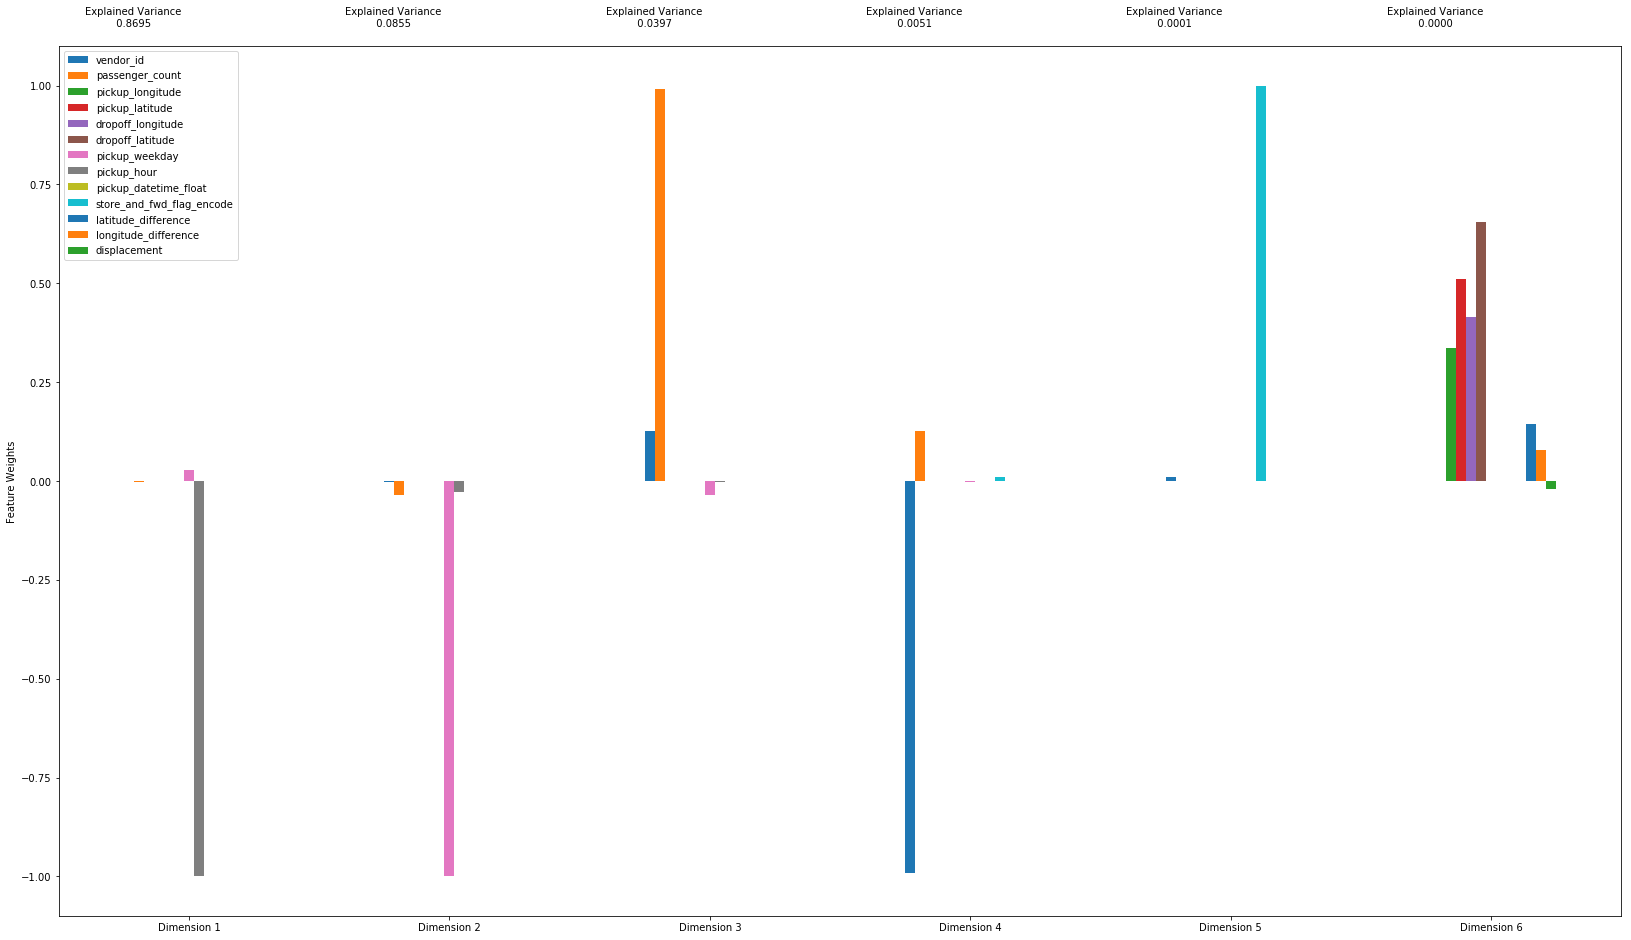

In [10]:
#PCA on good data
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
%matplotlib inline

def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''
    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (28,16))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

#PCA
pca_comp = 6
from sklearn.decomposition import PCA
pca = PCA(n_components = pca_comp)
reduced_data = pca.fit_transform(good_data)
pca_bo_results = pca_results(good_data, pca)
print('shape of reduced data: ', reduced_data.shape)

In [11]:
#based on pca analysis, reducing features by dropping pick up and drop off latitude and longitude and vendor id
good_data.drop(['vendor_id', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], 
               axis=1, inplace=True)

In [12]:
#split data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(good_data, trip_time, test_size=0.2, random_state=0)
#predictions based on trip_time_hrs
#X_train, X_test, y_train, y_test = train_test_split(good_data, trip_time_hrs, test_size=0.2, random_state=0)

c:\users\shindeh3\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
#Define performance metrices
#define r2 performance metric
from sklearn.metrics import r2_score
def r2_performance_metric(y_true, y_predict):
    '''This function defines the performce metric based on the r2 score'''
    return r2_score(y_true, y_predict, multioutput = None)

#define rmsle performance metric
import math
def rmsle_score(y_true, y_pred):
    a = [math.log(val+1) for val in y_true if val >= 0]
    p = [math.log(val+1) for val in y_pred if val >= 0]
    squared_error = [math.pow(p_val-a_val,2) for p_val, a_val in zip(p, a)]
    mean_squared_error = np.mean(squared_error)
    return math.sqrt(mean_squared_error)

#unit tests
print(rmsle_score([1,1], [0,0]))
print(rmsle_score([1,1], [1,1]))
print(rmsle_score([2,2], [0,0]))
print(rmsle_score([-2,2], [0,0]))

0.6931471805599453
0.0
1.0986122886681098
1.0986122886681098


In [14]:
#Define accuracy for a given regressor
# Calculate accuracy for a given regressor
def modelandtest(regressor, X_train, X_test, y_train, y_test):
    regressor.fit(X_train, y_train)
    y_predict = regressor.predict(X_test)
    print('y_predict::', y_predict)
    print('y_test::', y_test)
    print('r2_score: ', r2_performance_metric(y_test, y_predict))
    print('rmsle_score: ', rmsle_score(y_test, y_predict))

In [15]:
#benchmark metric
from sklearn.linear_model import Ridge
reg_raw = Ridge(random_state=None)
print('Score for Ridge Regressor: ', modelandtest(reg_raw, X_train, X_test, y_train, y_test))

y_predict:: [ 1441.55539136   397.22653164   826.97236691 ...,   941.85955792
   370.63331595   632.653776  ]
y_test:: 128751     1306.0
597160      249.0
1101932     522.0
697249      330.0
617640      353.0
609443      249.0
784143      459.0
964431      379.0
428975      363.0
1109815     511.0
42411      1254.0
600471      575.0
473045      221.0
648140     1317.0
821487      483.0
231689      292.0
862021      866.0
306207     1393.0
1033601     795.0
1097826     322.0
1134983     745.0
730315      480.0
287194     2079.0
109037      219.0
1145787     767.0
760764      816.0
799343      535.0
681299     1198.0
374272     1129.0
205945      447.0
            ...  
200318      289.0
648284      952.0
891735     1182.0
441007      628.0
621336     1263.0
533429      470.0
798177      805.0
947825      427.0
382706      628.0
377981      953.0
498033      417.0
31926       738.0
513711      166.0
114997      538.0
285418      584.0
315796      750.0
451126      309.0
498754      622.0

In [16]:
display(X_train.dtypes)
display(y_train.head())

passenger_count              float64
pickup_weekday               float64
pickup_hour                  float64
pickup_datetime_float        float64
store_and_fwd_flag_encode    float64
latitude_difference          float64
longitude_difference         float64
displacement                 float64
dtype: object

401349      347.0
143402      765.0
1004502    1108.0
1161672     407.0
505731      860.0
Name: trip_duration, dtype: float64

In [17]:
#create keras model
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
def keras_model_raw():
    print('Creating the model')
    base_model = Sequential()
    base_model.add(Dense(8, input_dim=8))
    base_model.add(Activation('tanh'))
    #base_model.add(Dense(16))
    #base_model.add(Activation('relu'))
    #base_model.add(Dense(4))
    #base_model.add(Activation('relu'))
    base_model.add(Dense(1))
    base_model.add(Activation('tanh'))
    base_model.compile(loss='mean_squared_error', optimizer='adam')
    base_model.summary()
    return base_model

from keras.wrappers.scikit_learn import KerasRegressor
print('building the model')
keras_regressor = KerasRegressor(build_fn=keras_model_raw, batch_size=100, 
                                 epochs=3, validation_split=0.2, verbose=1, shuffle=True)
#print('kfold cross validation')
#kfold = KFold(n_splits=3, random_state=1)
#results = cross_val_score(keras_regressor, np.array(X_train), np.array(y_train), cv=kfold)
#print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

print('training the model')
keras_regressor.fit(np.array(X_train), np.array(y_train))
print('predicting the values')
y_predict = keras_regressor.predict(np.array(X_test))
print(np.exp(y_predict))
print(np.array(y_test))
print('r2_score: ', r2_performance_metric(np.array(y_test), y_predict))
print('rmsle_score: ', rmsle_score(np.array(y_test), y_predict))

Using TensorFlow backend.


building the model
training the model
Creating the model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
activation_1 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Train on 763141 samples, validate on 190786 samples
Epoch 1/3
763141/763141 [==============================] - 9s - loss: 590784.1556 - val_loss: 590701.6583
Epoch 2/3
763141/763141 [==============================] - 8s -

In [19]:
y_max = np.max(y_train)
y_train = [val/y_max for val in y_train]

In [ ]:
print('Creating the model')
base_model = Sequential()
base_model.add(Dense(4096, input_dim=8))
base_model.add(Dropout(0.25))
base_model.add(Activation('tanh'))
base_model.add(Dense(2048))
base_model.add(Dropout(0.25))
base_model.add(Activation('tanh'))
base_model.add(Dense(1024))
base_model.add(Dropout(0.25))
base_model.add(Activation('tanh'))
base_model.add(Dense(128))
base_model.add(Dropout(0.25))
base_model.add(Activation('tanh'))
base_model.add(Dense(64))
base_model.add(Dropout(0.25))
base_model.add(Activation('tanh'))
base_model.add(Dense(16))
base_model.add(Activation('tanh'))
base_model.add(Dense(4))
base_model.add(Activation('tanh'))
base_model.add(Dense(1))
base_model.add(Activation('tanh'))
base_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
base_model.summary()

print('building the model')
base_model.fit(np.array(X_train), np.array(y_train), batch_size=100, epochs=10, 
               validation_split=0.2, verbose=1, shuffle=True)
print('predicting the values')
y_predict = base_model.predict(np.array(X_test))
y_predict = [val*y_max for val in y_predict]
print(y_predict[:5])
print(np.array(y_test[:5]))
print('r2_score: ', r2_performance_metric(np.array(y_test), y_predict))
print('rmsle_score: ', rmsle_score(np.array(y_test), y_predict))

Creating the model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_210 (Dense)            (None, 4096)              36864     
_________________________________________________________________
dropout_165 (Dropout)        (None, 4096)              0         
_________________________________________________________________
activation_210 (Activation)  (None, 4096)              0         
_________________________________________________________________
dense_211 (Dense)            (None, 2048)              8390656   
_________________________________________________________________
dropout_166 (Dropout)        (None, 2048)              0         
_________________________________________________________________
activation_211 (Activation)  (None, 2048)              0         
_________________________________________________________________
dense_212 (Dense)            (None, 1024)              20

In [41]:
#import test data
testing_data = pd.read_csv('test.csv')
display(testing_data.head())
print('Training data shape: ', testing_data.shape)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


Training data shape:  (625134, 9)


In [42]:
#model test data
testing_data['pickup_weekday'] = [get_weekday(date_str) for date_str in testing_data['pickup_datetime']]
print('weekdays extracted')

def get_hour(date_str):
    time_obj = time.strptime(date_str,time_format)
    return time_obj.tm_hour

testing_data['pickup_hour'] = [get_hour(date_str) for date_str in testing_data['pickup_datetime']]
print('hours extracted')

testing_data['pickup_datetime_float'] = [math.log(time.mktime(time.strptime(d,time_format))) 
                                    for d in testing_data['pickup_datetime']]
print('time changed to float')

print(testing_data.store_and_fwd_flag.unique())
testing_data['store_and_fwd_flag_encode'] = np.where(testing_data['store_and_fwd_flag'].str.match('Y'),1,0)
print('store and forward flag encoded')

testing_data['latitude_difference'] = [dropoff_val-pickup_val for pickup_val, dropoff_val in 
                                            zip(testing_data['pickup_latitude'], testing_data['dropoff_latitude'])]
testing_data['longitude_difference'] = [dropoff_val-pickup_val for pickup_val, dropoff_val in 
                                            zip(testing_data['pickup_longitude'], testing_data['dropoff_longitude'])]
testing_data['displacement'] = [math.sqrt(math.pow(lat_diff,2)+math.pow(long_diff,2)) for lat_diff, long_diff in 
                                            zip(testing_data['latitude_difference'], 
                                                testing_data['longitude_difference'])]
print('displacement calculated')

testing_trip_id = testing_data['id']
print('testing id separated')

testing_data.drop(['id', 'pickup_datetime', 'store_and_fwd_flag'], axis=1, inplace=True)
#drop columns which are not required based on pca
testing_data.drop(['vendor_id', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], 
               axis=1, inplace=True)
display(testing_data.head())
print(testing_data.shape)
print('unasable data dropped')

weekdays extracted
hours extracted
time changed to float
['N' 'Y']
store and forward flag encoded
displacement calculated
testing id separated


,passenger_count,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode,latitude_difference,longitude_difference,displacement
0,1,3,23,21.106682,0,0.024651,-0.002045,0.024735
1,1,3,23,21.106682,0,-0.024590,0.004395,0.024979
2,1,3,23,21.106682,0,-0.008060,0.011276,0.013861
3,1,3,23,21.106682,0,-0.041431,-0.030357,0.051363
4,1,3,23,21.106682,0,-0.005585,0.008705,0.010343


(625134, 8)
unasable data dropped


In [43]:
for key in testing_data:
    if testing_data[key].dtypes != 'object':
        testing_data[key] = testing_data[key].astype(np.float64)
display(testing_data.head())
display(testing_data.dtypes)

,passenger_count,pickup_weekday,pickup_hour,pickup_datetime_float,store_and_fwd_flag_encode,latitude_difference,longitude_difference,displacement
0,1.0,3.0,23.0,21.106682,0.0,0.024651,-0.002045,0.024735
1,1.0,3.0,23.0,21.106682,0.0,-0.024590,0.004395,0.024979
2,1.0,3.0,23.0,21.106682,0.0,-0.008060,0.011276,0.013861
3,1.0,3.0,23.0,21.106682,0.0,-0.041431,-0.030357,0.051363
4,1.0,3.0,23.0,21.106682,0.0,-0.005585,0.008705,0.010343


passenger_count              float64
pickup_weekday               float64
pickup_hour                  float64
pickup_datetime_float        float64
store_and_fwd_flag_encode    float64
latitude_difference          float64
longitude_difference         float64
displacement                 float64
dtype: object

In [44]:
#function to create test results in required format
def generate_test_results_csv(testing_trip_id, y_predict, filename):
    test_results = np.array(y_predict, dtype=int)
    result_export = pd.DataFrame({'id':testing_trip_id, 'trip_duration':test_results})
    display(result_export.head())
    print(result_export.shape)
    result_export.to_csv(filename, index=False)
    print('results exported successfully')

In [99]:
#testing results for xgboost optimised
y_predict_results = base_model.predict(np.array(testing_data))
y_predict_results = [val*y_max for val in y_predict_results]
y_time_column = np.array([val[0] for val in y_predict_results])
print(y_time_column.shape)
generate_test_results_csv(testing_trip_id, y_time_column, 'results_nn.csv')

(625134,)


,id,trip_duration
0,id3004672,645
1,id3505355,929
2,id1217141,298
3,id2150126,1120
4,id1598245,247


(625134, 2)
results exported successfully
